This note book load an pretrained model and predicts the line poistion.

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import random

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *

import ipywidgets as widgets
from ipywidgets import HBox
from IPython.display import display
from ipywidgets import IntSlider
from ipywidgets import Button, Layout

from jetcam.csi_camera import CSICamera

import cv2

import time

In [2]:
tf.__version__

'1.14.0'

In [3]:
# load the pretrained model from file
model = tf.keras.models.load_model('racerModel2.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [4]:
# create the camera object
camera = CSICamera(width=224, height=224, capture_width=1080, capture_height=720, capture_fps=30)

In [5]:
# read the camera and set to running. This will mean that we will only have to get the last value of the camera to get
# the latest frame
img = camera.read()
camera.running = True


In [8]:
# get the last value of the camera
img = camera.value

In [9]:
# rotate the image and convert to butes for the display widget
img = cv2.rotate(img, cv2.ROTATE_180)

# crop to get the bottom part of the image
img1 = img[150:170]


# convert the image to bytes for the image display widget
is_success, im_buf_arr = cv2.imencode(".jpg", img)
byte_im = im_buf_arr.tobytes()

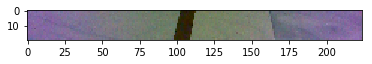

In [10]:
# plot using matplot lib the first image
imgplot = plt.imshow(img1)

In [11]:
# convert from integers to floats
X = img1.astype('float32')

# normalize to range 0-1
X = X / 255.0


In [12]:
# need to perform a first prediction so the model is fast
XX = np.array([X])
y_pred = model.predict(XX)
y_pred[0][0]

67.55556

create the widgets for showing the captured images and the line poistion

In [14]:
# start button widget
startButton = widgets.Button(
                    description='Start',
                    disabled=False,
                    button_style='', 
                    tooltip='Start',
                    icon='check' 
                )


# create the image display widget
imgDisp = widgets.Image(
            value=byte_im,
            format='png',
            width=300,
            height=400,
        )

# create the output widget for text message
output = widgets.Output()

# create a float slider wich will be used to display the center line offset
track = widgets.FloatSlider(
    value=7.5,
    min=0,
    max=225,
    step=0.1,
    description='',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
    layout=Layout(width='380px')
)

# create a horizontal box layout for the image display and the output messages
d = HBox([imgDisp, output])


# display to the screen the widgets
display(startButton,d,track)

# function to be executed by the button click
def predNewImages(b):
    
        # perform for 20 prames
        for i in range(20):
                
            # get image value and rotate
            img = camera.value
            img = cv2.rotate(img, cv2.ROTATE_180)

            
            # crop image
            img = img[150:170]
            
            # convert image from integers to floats
            X = img.astype('float32')

            # normalize to range 0-1
            X = X / 255.0
            
            # insert in numpy array
            X = np.array([X])
            
            # make a prediction of the center line position
            y_pred = model.predict(X)
            result = y_pred[0][0]
            
            
            # convert the image for the widget and set to the widget variable
            is_success, im_buf_arr = cv2.imencode(".jpg", img)
            byte_im = im_buf_arr.tobytes()
            imgDisp.value = byte_im
            
            # display the frame number and the prediction
            with output:
                
                output.clear_output()
            
                print('Frame No : ' + str(i) + 'Result : ' + str(result))

            time.sleep(0.2)


startButton.on_click(predNewImages)

Button(description='Start', icon='check', style=ButtonStyle(), tooltip='Start')

FloatSlider(value=7.5, continuous_update=False, layout=Layout(width='380px'), max=225.0, readout_format='.1f')